In [35]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import random
from scipy.stats import pearsonr
from datetime import datetime


In [49]:
#Define columns to erase
orig_df=pd.read_csv('fakedata.csv')
list(orig_df)

['City',
 'State',
 'Month of Period End',
 'Median Sale Price',
 'Median Sale Price MoM ',
 'Median Sale Price YoY ',
 'Homes Sold',
 'Homes Sold MoM ',
 'Homes Sold YoY ',
 'New Listings',
 'New Listings MoM ',
 'New Listings YoY ',
 'Inventory',
 'Inventory MoM ',
 ' Inventory YoY ',
 'Days on Market',
 'Days on Market MoM',
 'Days on Market YoY',
 'Average Sale To List',
 'Average Sale To List MoM ',
 'Average Sale To List YoY ']

In [50]:
clean_df =orig_df.drop(labels=['Median Sale Price YoY ',
 'Median Sale Price YoY ',
 'Homes Sold MoM ',
 'Homes Sold YoY ',
 'New Listings',
 'New Listings MoM ',
 'New Listings YoY ', 
' Inventory YoY ',
 'Days on Market',
 'Average Sale To List MoM ',
 'Average Sale To List YoY '], axis=1)
 
clean_df.head()


,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Homes Sold,Inventory,Inventory MoM,Days on Market MoM,Days on Market YoY,Average Sale To List
0,Austin,Texas,2/1/2012,190,5.60%,1403,6941,1.20%,0,-18,96.70%
1,Austin,Texas,3/1/2012,200,5.10%,2076,7394,6.50%,-16,-26,97.30%
2,Austin,Texas,4/1/2012,205,2.70%,2120,7698,4.10%,-19,-21,97.70%
3,Austin,Texas,5/1/2012,210,2.40%,2584,7908,2.70%,-3,-18,97.60%
4,Austin,Texas,6/1/2012,214,2.00%,2842,8152,3.10%,-5,-21,97.80%


In [51]:
#Clean spaces in the titles and rename month
clean_df.rename(columns={'Median Sale Price MoM ':'Median Sale Price MoM', 'Inventory MoM ':'Inventory MoM',
                        'Month of Period End':'Month'}, inplace=True)
list(clean_df)

['City',
 'State',
 'Month',
 'Median Sale Price',
 'Median Sale Price MoM',
 'Homes Sold',
 'Inventory',
 'Inventory MoM',
 'Days on Market MoM',
 'Days on Market YoY',
 'Average Sale To List']

In [52]:
#Check for the types of the columns
clean_df.dtypes


City                     object
State                    object
Month                    object
Median Sale Price         int64
Median Sale Price MoM    object
Homes Sold                int64
Inventory                 int64
Inventory MoM            object
Days on Market MoM        int64
Days on Market YoY        int64
Average Sale To List     object
dtype: object

In [53]:
#Coverting columns with percentages to numbers
columns=['Median Sale Price MoM','Inventory MoM','Average Sale To List']
for column in columns:
    clean_df[column]=clean_df[column].str.rstrip('%').astype(float)
clean_df.dtypes

City                      object
State                     object
Month                     object
Median Sale Price          int64
Median Sale Price MoM    float64
Homes Sold                 int64
Inventory                  int64
Inventory MoM            float64
Days on Market MoM         int64
Days on Market YoY         int64
Average Sale To List     float64
dtype: object

In [82]:



x_val=clean_df.loc[clean_df["City"]=='Austin','Inventory']
x_val1=[data for data in x_val]


In [83]:
y_val=clean_df.loc[clean_df["City"]=='Dallas','Inventory']
y_val1=[data for data in y_val]

In [ ]:
index=clean_df.loc[clean_df["City"]=='Dallas','Month of Period End']
index1=[data for data in index]
index1

In [127]:
data1=[]
for data in index1:
    month_d=datetime.strptime(data,'%m/%d/%Y').month
    year_d=datetime.strptime(data,'%m/%d/%Y').year
    data1.append(year_d)

    
    
    
   # if month_d==3 |month_d==6 |month_d==9 |month_d==12:
   #     data1.append(f"{month_d}-{year_d}")
    #else:
    #    data1.append('')

The correlation between variables is 0.6956


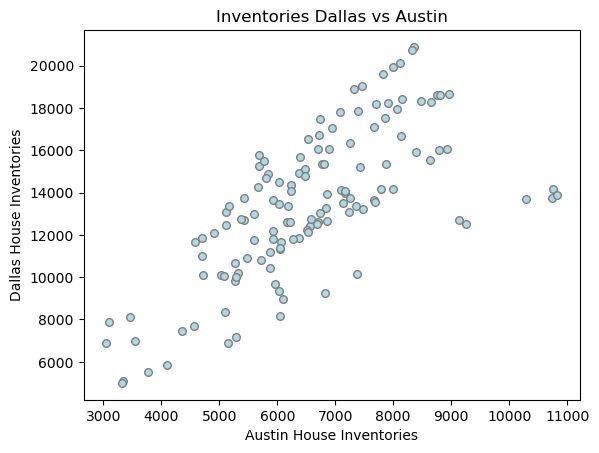

In [118]:
#Esto pertence a lo de inventories
correl, _=pearsonr(x_val1,y_val1)

plt.scatter(x_val1,y_val1,c='lightblue', s= 30, edgecolors="grey")

plt.title(f'Inventories Dallas vs Austin')
plt.xlabel('Austin House Inventories')
plt.ylabel("Dallas House Inventories")

print(f"The correlation between variables is {correl:.4f}")
plt.show()  


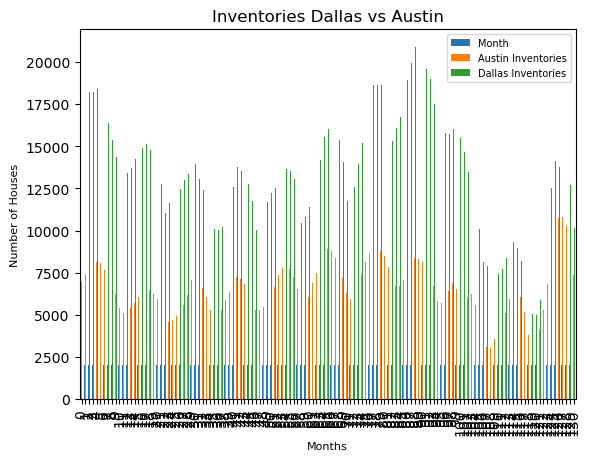

<Figure size 10000x7000 with 0 Axes>

In [130]:
#Bar graph

#HAcer graphicas con datos trimestrales o cuatrimestrales 

#bar_df = pd.DataFrame({ 'Austin Inventories': x_val1,'Dallas Inventories': y_val1})
bar_df = pd.DataFrame({'Month': data1, 'Austin Inventories': x_val1,'Dallas Inventories': y_val1})

#bargraph = bar_df.plot.bar(rot=90)
bargraph = bar_df.plot.bar(rot=90)
plt.title(f'Inventories Dallas vs Austin')
plt.xlabel('Months',fontsize=8)
plt.ylabel("Number of Houses",fontsize=8)
plt.legend(fontsize=7)

plt.figure(figsize= (100,70));